# HRD dropsondes from a given flight: 20210828
## data read, quicklook plots, and compare to GFS

### Notebook outline: 
[GFS grids section](#GFSgrids)

#### To-do list: 
Need to multiply pandas columns by pint units to unlock MetPy functionality



In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import metpy

In [2]:
# Dropsonde access:
# https://seb.noaa.gov/pub/acdata/2021/AVAPS/20210828I1/ASPEN_DATA/D20210828_091908QC.frd
# No need to download! read directly from the Web, it is small data.  
# I had to manually make column names,
cnames = ['IX','t_s','P_mb','T_C','RH','Z_m','WD','WS_ms','U_ms','V_ms','NS','WZ_ms','ZW_m','FP','FT','FH','FW','LAT','LON']

filename = 'https://seb.noaa.gov/pub/acdata/2021/AVAPS/20210828I1/ASPEN_DATA/D20210828_091908QC.frd'
df = pd.read_csv(filename, skiprows=21, delim_whitespace=True, names=cnames)
df 



,IX,t_s,P_mb,T_C,RH,Z_m,WD,WS_ms,U_ms,V_ms,NS,WZ_ms,ZW_m,FP,FT,FH,FW,LAT,LON
0,1,0.00,-999.0,-999.00,-999.0,-999,-999,-999.00,-999.00,-999.00,5,-999.0,-999,0,0,0,0,-999.000,-999.000
1,2,0.25,-999.0,-999.00,-999.0,-999,-999,-999.00,-999.00,-999.00,5,-999.0,-999,0,0,0,0,-999.000,-999.000
2,3,0.50,-999.0,-999.00,83.6,-999,-999,-999.00,-999.00,-999.00,5,-999.0,-999,0,0,0,0,-999.000,-999.000
3,4,0.75,-999.0,-999.00,-999.0,-999,-999,-999.00,-999.00,-999.00,5,-999.0,-999,0,0,0,0,-999.000,-999.000
4,5,1.00,-999.0,-999.00,83.5,-999,-999,-999.00,-999.00,-999.00,4,-999.0,-999,0,0,0,0,-999.000,-999.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150,1151,287.50,1006.8,26.79,70.0,17,55,17.94,-14.77,-10.19,10,-1.2,17,0,0,0,0,25.168,-86.752
1151,1152,287.75,-999.0,-999.00,-999.0,-999,57,17.86,-14.96,-9.75,11,-999.0,-999,0,0,0,0,-999.000,-999.000
1152,1153,288.00,1007.6,26.86,69.7,10,59,17.77,-15.17,-9.26,12,-1.3,10,0,0,0,0,25.168,-86.752
1153,1154,288.25,-999.0,-999.00,-999.0,-999,-999,-999.00,-999.00,-999.00,11,-999.0,-999,0,0,0,0,-999.000,-999.000


In [3]:
# replace -999 values with NaN mask 
df.mask((df <= -900), inplace=True)
df

,IX,t_s,P_mb,T_C,RH,Z_m,WD,WS_ms,U_ms,V_ms,NS,WZ_ms,ZW_m,FP,FT,FH,FW,LAT,LON
0,1,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,0,0,0,0,NaN,NaN
1,2,0.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,0,0,0,0,NaN,NaN
2,3,0.50,NaN,NaN,83.6,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,0,0,0,0,NaN,NaN
3,4,0.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,0,0,0,0,NaN,NaN
4,5,1.00,NaN,NaN,83.5,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,0,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150,1151,287.50,1006.8,26.79,70.0,17.0,55.0,17.94,-14.77,-10.19,10.0,-1.2,17.0,0,0,0,0,25.168,-86.752
1151,1152,287.75,NaN,NaN,NaN,NaN,57.0,17.86,-14.96,-9.75,11.0,NaN,NaN,0,0,0,0,NaN,NaN
1152,1153,288.00,1007.6,26.86,69.7,10.0,59.0,17.77,-15.17,-9.26,12.0,-1.3,10.0,0,0,0,0,25.168,-86.752
1153,1154,288.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN,NaN,0,0,0,0,NaN,NaN


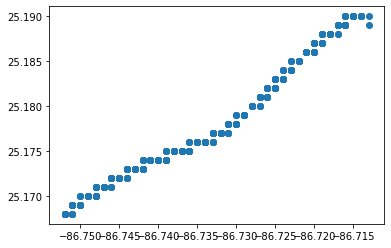

In [55]:
# Where was the drosonde as it fell? 
plt.scatter(df.LON, df.LAT)

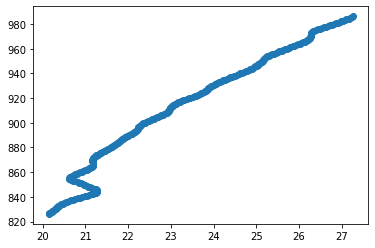

In [203]:
# Temperature profile
plt.scatter(df.T_C, df.P_mb)

--------------------------
# OK, that was one sonde -- want to combine all of them from a flight
Should we open all the sondes as a [dataframe of dataframes](https://stackoverflow.com/questions/35932060/dataframe-of-dataframes-in-python-pandas)? Here I concatenate them into one big dataframe. 

# Discover all the .frd filenames in 20210828I1 flight's directory

In [18]:
# Helper function 
def findall(p, s):
    '''Yields all the positions of the pattern p in the string s.'''
    i = s.find(p)
    while i != -1:
        yield i
        i = s.find(p, i+1)

In [19]:
# Request the response to a directory URL 'https://seb.noaa.gov/pub/acdata/2021/AVAPS/20210828I1/ASPEN_DATA/'
# and find all filenames ending in .frd

import requests
r = requests.get('https://seb.noaa.gov/pub/acdata/2021/AVAPS/20210828I1/ASPEN_DATA/')
content = r.text

FRDfiles = []
for i in findall('.frd', content):
    FRDfiles.append(content[i-18:i+4])

# remove duplicates
FRDfiles = list(set(FRDfiles))
# Prepend full path
FRDpaths = ['https://seb.noaa.gov/pub/acdata/2021/AVAPS/20210828I1/ASPEN_DATA/' +s for s in FRDfiles]
#FRDpaths

In [20]:
# List of dataframes
drops = []

for ifile in FRDpaths: 
    df = pd.read_csv(ifile, skiprows=21, delim_whitespace=True, names=cnames)
    df.mask((df <= -900), inplace=True)
    drops.append(df)

In [21]:
alldrops = pd.concat(drops)

In [22]:
alldrops

,IX,t_s,P_mb,T_C,RH,Z_m,WD,WS_ms,U_ms,V_ms,NS,WZ_ms,ZW_m,FP,FT,FH,FW,LAT,LON
0,1,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,0,0,0,0,25.997,-85.797
1,2,0.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,0,0,0,0,NaN,NaN
2,3,0.50,NaN,NaN,75.0,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,0,0,0,0,25.997,-85.798
3,4,0.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,0,0,0,0,NaN,NaN
4,5,1.00,NaN,NaN,75.0,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,0,0,0,0,25.998,-85.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
867,868,216.75,NaN,NaN,NaN,NaN,63.0,30.93,-27.48,-14.21,9.0,NaN,NaN,0,0,0,0,NaN,NaN
868,869,217.00,992.2,25.91,93.6,39.0,63.0,30.99,-27.52,-14.26,9.0,-1.5,39.0,0,0,0,0,24.779,-85.798
869,870,217.25,NaN,NaN,NaN,NaN,63.0,31.06,-27.57,-14.32,9.0,NaN,NaN,0,0,0,0,NaN,NaN
870,871,217.50,992.9,26.01,93.8,33.0,NaN,NaN,NaN,NaN,9.0,-1.5,33.0,0,0,0,0,NaN,NaN


#### No reason to get fussy about horizontal interpolation in 1/4 deg GFS, it seems 

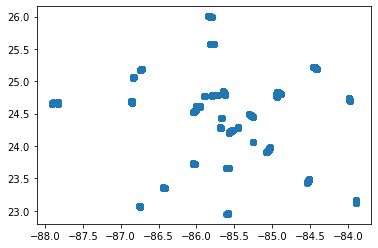

In [132]:
# all the locations 
plt.scatter(alldrops.LON, alldrops.LAT)

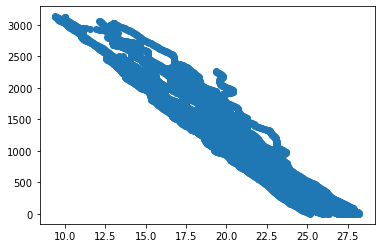

In [133]:
# all the T profiles 
plt.scatter(alldrops.T_C, alldrops.Z_m)

<a id='GFSgrids'></a>

# Let's get some model grids to compare to 

[Back to Outline](#Outline)

In [ ]:
import datetime
import xarray as xr 

In [24]:
flight_date = '20210828'
HH = 12 # roughly 12Z judging from dropsonde times

YYYY = flight_date[0:4]
MM = flight_date[4:6]
DD = flight_date[6:8]

fltime = datetime.datetime(int(YYYY),int(MM),int(DD), HH)

# intialization time is flight time minus lead time. Look at 6h forecast: 
lead = 6 # hours
init = fltime - datetime.timedelta(hours=lead)

foldername = str(init.strftime('%Y%m%d'))
filename = str(init.strftime('%Y%m%d%H'))+'.f'+str(lead).zfill(3)
URL = 'https://rda.ucar.edu/thredds/dodsC/files/g/ds084.1/2021/' \
    + foldername+'/gfs.0p25.'+filename+'.grib2'
 
# Open URL as a dataset 
GFS6h = xr.open_dataset(URL)
# Subset 
#ds.sel(lon=slice(100,135), lat=slice(45,20))
GFS6h 

<xarray.Dataset>
Dimensions:                                                                   (
                                                                               lat: 721,
                                                                               lon: 1440,
                                                                               time: 1,
                                                                               time_bounds_1: 2,
                                                                               time1: 1,
                                                                               ...
                                                                               height_above_ground4: 1,
                                                                               height_above_ground5: 2,
                                                                               potential_vorticity_surface: 2,
                                                                               sigma: 1,
                                                                               hybrid: 1,
                                                                               hybrid1: 2)
Coordinates: (12/26)
  * lat                                                                       (lat) float32 ...
  * lon                                                                       (lon) float32 ...
    reftime                                                                   datetime64[ns] ...
  * time                                                                      (time) datetime64[ns] ...
  * time1                                                                     (time1) datetime64[ns] ...
  * height_above_ground                                                       (height_above_ground) float32 ...
    ...                                                                        ...
  * height_above_ground4                                                      (height_above_ground4) float32 ...
  * height_above_ground5                                                      (height_above_ground5) float32 ...
  * potential_vorticity_surface                                               (potential_vorticity_surface) float32 ...
  * sigma                                                                     (sigma) float32 ...
  * hybrid                                                                    (hybrid) float32 ...
  * hybrid1                                                                   (hybrid1) float32 ...
Dimensions without coordinates: time_bounds_1,
                                pressure_difference_layer_bounds_1,
                                height_above_ground_layer_bounds_1,
                                height_above_ground_layer1_bounds_1,
                                pressure_difference_layer1_bounds_1,
                                pressure_difference_layer2_bounds_1,
                                sigma_layer_bounds_1,
                                depth_below_surface_layer_bounds_1
Data variables: (12/179)
    LatLon_Projection                                                         int32 ...
    time_bounds                                                               (time, time_bounds_1) datetime64[ns] ...
    pressure_difference_layer_bounds                                          (pressure_difference_layer, pressure_difference_layer_bounds_1) float32 ...
    height_above_ground_layer_bounds                                          (height_above_ground_layer, height_above_ground_layer_bounds_1) float32 ...
    height_above_ground_layer1_bounds                                         (height_above_ground_layer1, height_above_ground_layer1_bounds_1) float32 ...
    pressure_difference_layer1_bounds                                         (pressure_difference_layer1, pressure_difference_layer1_bounds_1) float32 ...
    ...                                                   

In [26]:
# Sample it at the dropsonde df points, based on df.LAT, df.LON, df.P_mb *100 for Pascals

# Sample one geographic column, based on first line of sone header df.LAT[0]
GFS6T = GFS6h['Temperature_isobaric'].sel(lat=df.LAT[0],lon=df.LON[0],method='nearest')
GFS6T

<xarray.DataArray 'Temperature_isobaric' (time1: 1, isobaric: 41)>
array([[183.9873 , 204.01021, 213.49535, 221.55101, 223.62743, 238.64369,
        257.8452 , 263.77463, 260.0214 , 255.15253, 246.85867, 240.59349,
        231.53813, 230.24812, 225.8919 , 221.86536, 219.98863, 215.49481,
        211.0132 , 203.04332, 200.49896, 208.42279, 220.55621, 230.50098,
        239.98235, 248.81975, 255.824  , 260.78525, 264.5653 , 270.47992,
        274.97693, 280.17413, 285.94647, 291.5586 , 296.90475, 302.00232,
        306.97937, 309.44528, 311.87457, 314.7746 , 316.2124 ]], dtype=float32)
Coordinates:
    lat       float32 24.75
    lon       float32 0.0
    reftime   datetime64[ns] 2021-08-28T06:00:00
  * time1     (time1) datetime64[ns] 2021-08-28T12:00:00
  * isobaric  (isobaric) float32 1.0 2.0 4.0 7.0 ... 9.5e+04 9.75e+04 1e+05
Attributes:
    long_name:                       Temperature @ Isobaric surface
    units:                           K
    abbreviation:                    TMP
    grid_mapping:                    LatLon_Projection
    Grib_Variable_Id:                VAR_0-0-0_L100
    Grib2_Parameter:                 [0 0 0]
    Grib2_Parameter_Discipline:      Meteorological products
    Grib2_Parameter_Category:        Temperature
    Grib2_Parameter_Name:            Temperature
    Grib2_Level_Type:                100
    Grib2_Level_Desc:                Isobaric surface
    Grib2_Generating_Process_Type:   Forecast
    Grib2_Statistical_Process_Type:  UnknownStatType--1

In [7]:
df.P_mb.describe()

count     564.000000
mean      846.989716
std        88.926553
min       699.800000
25%       769.575000
50%       843.650000
75%       922.550000
max      1008.700000
Name: P_mb, dtype: float64

In [27]:
plist= df.P_mb.values
Tlist= plist.copy()*0 # right shaped container with NaNs in the right places

# Loop over all non-NAN levels and replace 
for i in np.argwhere( np.isfinite(plist) ): 
    Tlist[i] = np.interp(plist[i],GFS6h.isobaric,GFS6T.values)
    
plt.plot(Tlist, -plist)

ValueError: object too deep for desired array

In [ ]:
GFS6

In [16]:
np.interp?

Signature: np.interp(x, xp, fp, left=None, right=None, period=None)
Docstring:
One-dimensional linear interpolation for monotonically increasing sample points.

Returns the one-dimensional piecewise linear interpolant to a function
with given discrete data points (`xp`, `fp`), evaluated at `x`.

Parameters
----------
x : array_like
    The x-coordinates at which to evaluate the interpolated values.

xp : 1-D sequence of floats
    The x-coordinates of the data points, must be increasing if argument
    `period` is not specified. Otherwise, `xp` is internally sorted after
    normalizing the periodic boundaries with ``xp = xp % period``.

fp : 1-D sequence of float or complex
    The y-coordinates of the data points, same length as `xp`.

left : optional float or complex corresponding to fp
    Value to return for `x < xp[0]`, default is `fp[0]`.

right : optional float or complex corresponding to fp
    Value to return for `x > xp[-1]`, default is `fp[-1]`.

period : None or float, opt

In [256]:
for i in goodvals.index:
    plev = GFSTprof[i]
    GFSTprof[i] = GFS6T.sel(isobaric=plev, method='nearest', tolerance=50).values
    print(i, plev, GFSTprof[i])

258 246.78866577148438 254.73251342773438
260 246.78866577148438 254.73251342773438
262 246.78866577148438 254.73251342773438
264 246.78866577148438 254.73251342773438
266 246.78866577148438 254.73251342773438
268 246.78866577148438 254.73251342773438
270 246.78866577148438 254.73251342773438
272 246.78866577148438 254.73251342773438
274 246.78866577148438 254.73251342773438
276 246.78866577148438 254.73251342773438
278 246.78866577148438 254.73251342773438
280 246.78866577148438 254.73251342773438
282 246.78866577148438 254.73251342773438
284 246.78866577148438 254.73251342773438
286 246.78866577148438 254.73251342773438
288 246.78866577148438 254.73251342773438
290 246.78866577148438 254.73251342773438
292 246.78866577148438 254.73251342773438
294 246.78866577148438 254.73251342773438
296 246.78866577148438 254.73251342773438
298 246.78866577148438 254.73251342773438
300 246.78866577148438 254.73251342773438
302 246.78866577148438 254.73251342773438
304 246.78866577148438 254.7325134

In [236]:
# Sample sonde pressure levels 
GFS6Ts = GFS6T.sel(isobaric = df.P_mb.values*100., method='nearest')
GFS6Ts

<xarray.DataArray 'Temperature_isobaric' (time1: 1, isobaric: 858)>
array([[268.9124, 268.9124, 268.9124, ..., 268.9124, 268.9124, 268.9124]],
      dtype=float32)
Coordinates:
    lat       float32 90.0
    lon       float32 359.8
    reftime   datetime64[ns] 2021-08-28T06:00:00
  * time1     (time1) datetime64[ns] 2021-08-28T12:00:00
  * isobaric  (isobaric) float32 1e+05 1e+05 1e+05 1e+05 ... 1e+05 1e+05 1e+05
Attributes:
    long_name:                       Temperature @ Isobaric surface
    units:                           K
    abbreviation:                    TMP
    grid_mapping:                    LatLon_Projection
    Grib_Variable_Id:                VAR_0-0-0_L100
    Grib2_Parameter:                 [0 0 0]
    Grib2_Parameter_Discipline:      Meteorological products
    Grib2_Parameter_Category:        Temperature
    Grib2_Parameter_Name:            Temperature
    Grib2_Level_Type:                100
    Grib2_Level_Desc:                Isobaric surface
    Grib2_Generating_Process_Type:   Forecast
    Grib2_Statistical_Process_Type:  UnknownStatType--1

(array([4.17404988e+08, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.32200540e+07,
        2.84632920e+07, 1.62540378e+08]),
 array([264.82935, 269.96765, 275.10596, 280.24426, 285.38257, 290.52087,
        295.65918, 300.7975 , 305.9358 , 311.0741 , 316.2124 ],
       dtype=float32),
 <BarContainer object of 10 artists>)

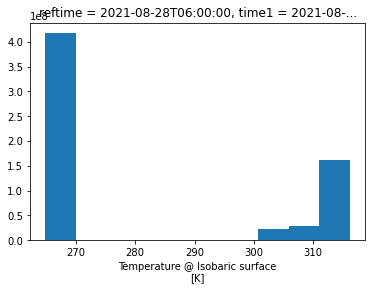

In [213]:
GFS6T.plot()

In [175]:
# Put the unraveled linear array of values into 
#  another column of the dropsonde dataframe
df['GFS6T'] = pd.Series(GFS6T.values.ravel)

In [176]:
df

,IX,t_s,P_mb,T_C,RH,Z_m,WD,WS_ms,U_ms,V_ms,NS,WZ_ms,ZW_m,FP,FT,FH,FW,LAT,LON,GFS6T
0,1,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,0,0,0,NaN,NaN,<built-in method ravel of numpy.ndarray object...
1,2,0.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,0,0,0,0,NaN,NaN,NaN
2,3,0.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,0,0,0,0,NaN,NaN,NaN
3,4,0.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,0,0,0,0,NaN,NaN,NaN
4,5,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,854,213.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,0,0,0,NaN,NaN,NaN
854,855,213.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,0,0,0,NaN,NaN,NaN
855,856,213.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,0,0,0,NaN,NaN,NaN
856,857,213.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,0,0,0,NaN,NaN,NaN


In [179]:
df['GFS6T'].values


array([<built-in method ravel of numpy.ndarray object at 0x210f21b70>,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan

In [181]:
GFS6T.values.plot()

AttributeError: 'numpy.ndarray' object has no attribute 'plot'